### Script for reading data for Problem 4.2 (data_MoleculeTypes.txt) in Applied Statistics 2021 exam:

This script reads the file __"data_MoleculeTypes.txt"__ for Problem 4.2 in the exam of Applied Statistics 2021/22. This data files contains 986 entries in two columns: 

* **size** ($\mathrm{\mu m}$) of particles,
* **intensity** of particles.

The script was distributed along with the exam and the data file itself on the 20th of January 2022.

####  Author: 
- Troels Petersen (Niels Bohr Institute, petersen@nbi.dk)

####  Date:   
 - 19th of January 2022 (first version)

In [91]:
import random
import numpy as np                                     # Matlab like syntax for linear algebra and functions
import matplotlib.pyplot as plt                        # Plots and figures like you know them from Matlab
import seaborn as sns                                  # Make the plots nicer to look at
from iminuit import Minuit                             # The actual fitting tool, better than scipy's
import sys                                             # Modules to see files and folders in directories
from scipy import stats
from scipy.stats import binom, poisson, norm ,gamma           # Functions from SciPy Stats...
# import scipy.optimize as optimization
from scipy import optimize
from numpy.linalg import inv
from functools import partial
from fitter import Fitter
from astropy.modeling import models, fitting

In [92]:
sys.path.append('D:\my github\Siyi Applied Stats\Documents for JN\AppStat2021-main\External_Functions\\')
from ExternalFunctions import Chi2Regression, BinnedLH, UnbinnedLH
from ExternalFunctions import nice_string_output, add_text_to_ax    # Useful functions to print fit results on figure

plt.rcParams['font.size'] = 18     # Set some basic plotting parameters

In [93]:
import pandas as pd

In [94]:
dataframe = pd.read_csv('data_MoleculeTypes.csv', header=0, index_col=None)
size, intensity = dataframe.values.T
dataframe

,size(microm),intensity
0,45.267,0.800
1,43.549,0.736
2,41.326,0.390
3,26.767,0.281
4,24.066,0.220
...,...,...
981,44.660,0.576
982,41.076,0.744
983,42.454,0.657
984,53.994,0.698


Print the first 10 entries to check the content of the file:

In [95]:
for i in range(10):
    print(f"  size = {size[i]:4.3f} microm    intensity = {intensity[i]:5.3f}")

  size = 45.267 microm    intensity = 0.800
  size = 43.549 microm    intensity = 0.736
  size = 41.326 microm    intensity = 0.390
  size = 26.767 microm    intensity = 0.281
  size = 24.066 microm    intensity = 0.220
  size = 48.232 microm    intensity = 0.766
  size = 27.078 microm    intensity = 0.655
  size = 46.099 microm    intensity = 0.577
  size = 45.537 microm    intensity = 0.543
  size = 44.078 microm    intensity = 0.659


In [96]:
print(np.min(size),np.max(size))

2.487 72.426


In [97]:
intensity2=np.zeros_like(intensity)

In [99]:
intensity_left=np.zeros_like(intensity)
intensity_right=np.zeros_like(intensity)
for i in range(0,985):
    if intensity[i]<0.565:
        intensity_left[i]=intensity[i]
    if intensity[i]>0.49:
        intensity_right[i]=intensity[i]
intensity_left = intensity_left[intensity_left != 0]
intensity_right = intensity_right[intensity_right != 0]
print(intensity_left.size,intensity_right.size)

244 836


In [66]:
'''
Nbins = 100
#xmin2,xmax2=0,1.2
#binWidth= (xmax2-xmin2)/Nbins
fig2, ax2 = plt.subplots(figsize=(15, 9))
#ax2.hist(intensity, bins=Nbins, range=(xmin2, xmax2), histtype='step', label='Histogram (size)' )
ax2.scatter(size,intensity,c='blue', label='x=size,y=intensity')
ax2.set(xlabel="size", ylabel="intensity")


# Define the figure text
d2 = {'Entries': len(size),
      'size_Mean': size.mean(),
      'size_Std': size.std(ddof=1),
      'intensity_Mean': intensity.mean(),
      'intensity_Std': intensity.std(ddof=1),
    }

# Add figure text
text2 = nice_string_output(d2, extra_spacing=2, decimals=3)
add_text_to_ax(0.02, 0.87, text2, ax2, fontsize=18)

# Add legend
ax2.legend(loc='upper left')

plt.title('scatter of large molecules')
fig2.tight_layout()

fig2.savefig("fig8.png", dpi=600)
'''

'\nNbins = 100\n#xmin2,xmax2=0,1.2\n#binWidth= (xmax2-xmin2)/Nbins\nfig2, ax2 = plt.subplots(figsize=(15, 9))\n#ax2.hist(intensity, bins=Nbins, range=(xmin2, xmax2), histtype=\'step\', label=\'Histogram (size)\' )\nax2.scatter(size,intensity,c=\'blue\', label=\'x=size,y=intensity\')\nax2.set(xlabel="size", ylabel="intensity")\n\n\n# Define the figure text\nd2 = {\'Entries\': len(size),\n      \'size_Mean\': size.mean(),\n      \'size_Std\': size.std(ddof=1),\n      \'intensity_Mean\': intensity.mean(),\n      \'intensity_Std\': intensity.std(ddof=1),\n    }\n\n# Add figure text\ntext2 = nice_string_output(d2, extra_spacing=2, decimals=3)\nadd_text_to_ax(0.02, 0.87, text2, ax2, fontsize=18)\n\n# Add legend\nax2.legend(loc=\'upper left\')\n\nplt.title(\'scatter of large molecules\')\nfig2.tight_layout()\n\nfig2.savefig("fig8.png", dpi=600)\n'

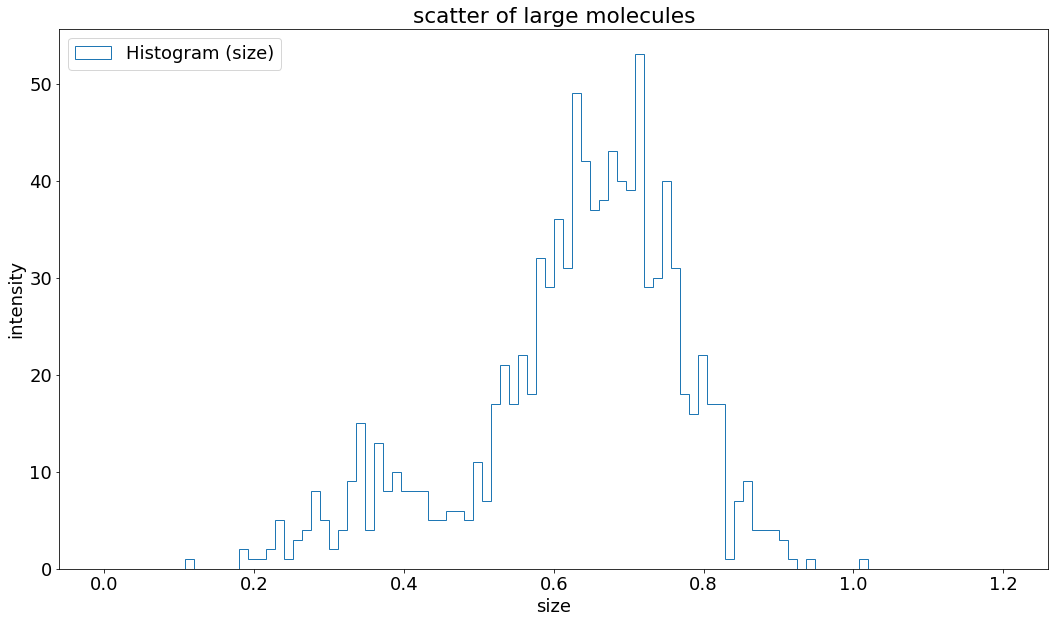

In [67]:
Nbins = 100
#xmin2,xmax2=0,1.2
#binWidth= (xmax2-xmin2)/Nbins
fig3, ax3 = plt.subplots(figsize=(15, 9))
ax3.hist(intensity, bins=Nbins, range=(xmin2, xmax2), histtype='step', label='Histogram (size)' )
#ax3.scatter(size,intensity,c='blue', label='x=size,y=intensity')
ax3.set(xlabel="size", ylabel="intensity")


# Define the figure text
d2 = {'Entries': len(size),
      'size_Mean': size.mean(),
      'size_Std': size.std(ddof=1),
      'intensity_Mean': intensity.mean(),
      'intensity_Std': intensity.std(ddof=1),
    }

# Add figure text
text2 = nice_string_output(d2, extra_spacing=2, decimals=3)
add_text_to_ax(0.02, 0.87, text2, ax2, fontsize=18)

# Add legend
ax3.legend(loc='upper left')

plt.title('scatter of large molecules')
fig3.tight_layout()

fig3.savefig("fig9.png", dpi=600)

In [74]:
def fit_pdf(x, mu1, sigma1,mu2 ,sigma2,a):
    return a * binWidth * (1 / np.sqrt(2 * np.pi) / sigma1 * np.exp(-(x - mu1) ** 2 / 2. / sigma1 ** 2))+ (np.size(intensity)-a) * binWidth * (1 / np.sqrt(2 * np.pi) / sigma2 * np.exp(-(x - mu2) ** 2 / 2. / sigma2 ** 2))

In [75]:
x_all=intensity
xmin, xmax=xmin2, xmax2
counts, bin_edges = np.histogram(x_all, bins=Nbins, range=(xmin, xmax))
x = (bin_edges[1:][counts>0] + bin_edges[:-1][counts>0])/2
y = counts[counts>0]
sy = np.sqrt(counts[counts>0]) 

In [76]:

Minuit.print_level = 1    # Print result of fits (generally - can also be moved down to each fit instance)

# Defining Chi2 calculation:
def chi2_owncalc(mu1,sigma1,mu2,sigma2,a) :
    y_fit = fit_pdf(x,mu1,sigma1,mu2,sigma2,a)
    chi2 = np.sum(((y - y_fit) / sy)**2)
    return chi2

# Alternatively, use the Chi2 regression from External Functions:
chi2fit = Chi2Regression(fit_pdf,x, y, sy)

minuit_chi2 = Minuit(chi2_owncalc,mu1=0.3,sigma1=0.03,mu2=0.7,sigma2=0.05,a=100)
minuit_chi2.errordef = 1.0     # This is the definition for ChiSqaure fits
minuit_chi2.migrad()           # This is where the minimisation is carried out! Put ";" at the end to void output


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 112.6                      │              Nfcn = 163              │
│ EDM = 1.69e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu1    │   0.379   │   0.015   │            │            │         │         │       │
│ 1 │ sigma1 │   0.089   │   0.016   │            │            │         │         │       │
│ 2 │ mu2    │   0.667   │   0.004   │            │            │         │         │       │
│ 3 │ sigma2 │  0.0824   │  0.0030   │            │            │         │         │       │
│ 4 │ a      │    142    │    20     │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬───────────────────────────────────────────────────┐
│        │       mu1    sigma1       mu2    sigma2         a │
├────────┼───────────────────────────────────────────────────┤
│    mu1 │  0.000224  0.000167  3.67e-05 -2.79e-05     0.216 │
│ sigma1 │  0.000167  0.000269  3.74e-05 -2.66e-05     0.242 │
│    mu2 │  3.67e-05  3.74e-05  1.58e-05 -6.77e-06     0.049 │
│ sigma2 │ -2.79e-05 -2.66e-05 -6.77e-06   9.2e-06   -0.0376 │
│      a │     0.216     0.242     0.049   -0.0376       402 │
└────────┴───────────────────────────────────────────────────┘

In [77]:

# First, check if the result was a valid minimum:
if (not minuit_chi2.fmin.is_valid) :
    print("  WARNING: The ChiSquare fit DID NOT converge!!! ")    
    
# Short hand way of accessing the fit parameters:
fit_mu1,fit_sigma1,fit_mu2,fit_sigma2,fit_a= minuit_chi2.values[:]   # The fitted values of the parameters

# Loop to get both parameter values and uncertainties:
for name in minuit_chi2.parameters :
    value, error = minuit_chi2.values[name], minuit_chi2.errors[name]
    print(f"Fit value: {name} = {value:.5f} +/- {error:.5f}")

# Get Chi2 value:
chi2_value = minuit_chi2.fval            # The value minimised, i.e. Chi2 or -2*LogLikeliHood (LLH) value

# Get number of degrees-of-freedom (Ndof):
N_NotEmptyBin = np.sum(y > 0)
Ndof_value = N_NotEmptyBin - minuit_chi2.nfit

Prob_value = stats.chi2.sf(chi2_value, Ndof_value) # The chi2 probability given N_DOF degrees of freedom
print(f"Chi2 value: {chi2_value:.1f}   Ndof = {Ndof_value:.0f}    Prob(Chi2,Ndof) = {Prob_value:5.5f}")


Fit value: mu1 = 0.37902 +/- 0.01497
Fit value: sigma1 = 0.08906 +/- 0.01641
Fit value: mu2 = 0.66696 +/- 0.00397
Fit value: sigma2 = 0.08237 +/- 0.00303
Fit value: a = 142.01362 +/- 20.06060
Chi2 value: 112.6   Ndof = 60    Prob(Chi2,Ndof) = 0.00005


In [85]:
N1=142.01362
sigma_N1=20.06060
N2=843.98638
sigma_N2=20.06060

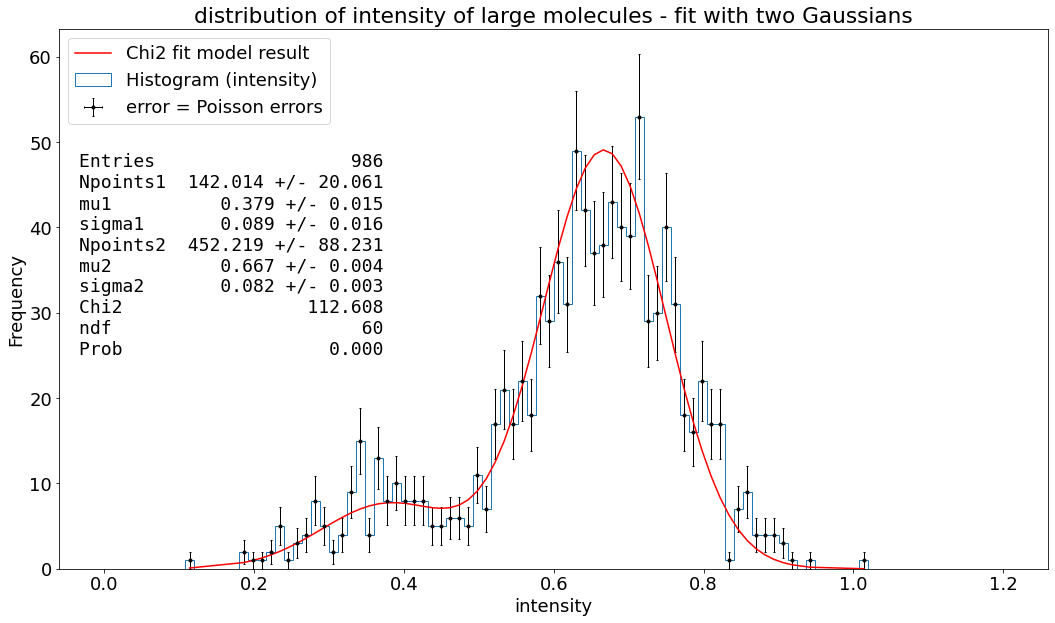

In [88]:
Nbins = 100

fig3, ax3 = plt.subplots(figsize=(15, 9))

ax3.hist(intensity, bins=Nbins, range=(xmin2, xmax2), histtype='step', label='Histogram (intensity)' )
ax3.set(xlabel="intensity", ylabel="Frequency")

ax3.errorbar(x, y, yerr=sy, xerr=0.0, label='error = Poisson errors', fmt='.k',  ecolor='k', elinewidth=1, capsize=1, capthick=1)

x_axis = np.linspace(xmin, xmax, 100)
ax3.plot(x, fit_pdf(x, *minuit_chi2.values[:]), '-r', label='Chi2 fit model result') 

# Define the figure text
d2 = {'Entries': len(size),
      'Npoints1': [minuit_chi2.values['a'], minuit_chi2.errors['a']],      
      'mu1': [minuit_chi2.values['mu1'], minuit_chi2.errors['mu1']],
      'sigma1': [minuit_chi2.values['sigma1'], minuit_chi2.errors['sigma1']],
      'Npoints2': [452.219, 88.2309],
      'mu2': [minuit_chi2.values['mu2'], minuit_chi2.errors['mu2']],
      'sigma2': [minuit_chi2.values['sigma2'], minuit_chi2.errors['sigma2']],
      'Chi2':     chi2_value,
      'ndf':      Ndof_value,
      'Prob':     Prob_value,
    }

# Add figure text
text3 = nice_string_output(d2, extra_spacing=2, decimals=3)
add_text_to_ax(0.02, 0.77, text3, ax3, fontsize=18)



# Add legend
ax3.legend(loc='upper left')
plt.title('distribution of intensity of large molecules - fit with two Gaussians')
fig3.tight_layout()

# Save figure
fig3.savefig("fig9.png", dpi=600)